In [1]:
import os
import requests
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
pool_address = "0x3211C6cBeF1429da3D0d58494938299C92Ad5860"
start_block = 14405401
pool_address.lower()

'0x3211c6cbef1429da3d0d58494938299c92ad5860'

In [6]:
api = "https://api.thegraph.com/subgraphs/name/convex-community/curve-factory-volume"
query = """
{
  hourlySwapVolumeSnapshots(
    first: 1000,
    orderBy: timestamp,
    orderDirection: desc,
    where: {
      pool: "0x3211c6cbef1429da3d0d58494938299c92ad5860"
    }
  )
  {
    timestamp
    volumeUSD
  }
}
"""
r = requests.post(api, json={'query': query})
data = dict(r.json())
timestamps = [int(i['timestamp']) for i in data['data']['hourlySwapVolumeSnapshots']]
timestamps = [datetime.datetime.fromtimestamp(i) for i in timestamps]

In [7]:
data

{'data': {'hourlySwapVolumeSnapshots': [{'timestamp': '1648299600',
    'volumeUSD': '997465.7471632290536352589837287242'},
   {'timestamp': '1648296000',
    'volumeUSD': '1345313.736416921341690670563024133'},
   {'timestamp': '1648292400',
    'volumeUSD': '2498382.595909566691572480774381233'},
   {'timestamp': '1648288800',
    'volumeUSD': '1059978.427016433451231426441099055'},
   {'timestamp': '1648285200',
    'volumeUSD': '1606106.921079003541145536052829265'},
   {'timestamp': '1648281600',
    'volumeUSD': '265187.1582075004734316766592055292'},
   {'timestamp': '1648278000',
    'volumeUSD': '154396.1403929985272154194062907329'},
   {'timestamp': '1648274400',
    'volumeUSD': '1841347.42668721890567807241909747'},
   {'timestamp': '1648270800',
    'volumeUSD': '1725354.537709238154956403947848312'},
   {'timestamp': '1648267200',
    'volumeUSD': '3271933.636062074742344860698379356'},
   {'timestamp': '1648263600',
    'volumeUSD': '7510460.944054847976969575012116708

In [8]:
data = pd.DataFrame(data['data']['hourlySwapVolumeSnapshots'])
data['volumeUSD'] = data.volumeUSD.astype(float)
timestamps = [datetime.datetime.fromtimestamp(int(i)) for i in data.timestamp]
data['timestamp'] = timestamps
data.set_index('timestamp', inplace=True)
data.sort_index(ascending=True, inplace=True)
data

,volumeUSD
timestamp,
2022-03-17 19:00:00,2.439338e+06
2022-03-17 20:00:00,2.456421e+06
2022-03-17 21:00:00,9.467293e+05
2022-03-17 22:00:00,9.735536e+05
2022-03-17 23:00:00,1.535507e+06
...,...
2022-03-26 11:00:00,1.606107e+06
2022-03-26 12:00:00,1.059978e+06
2022-03-26 13:00:00,2.498383e+06


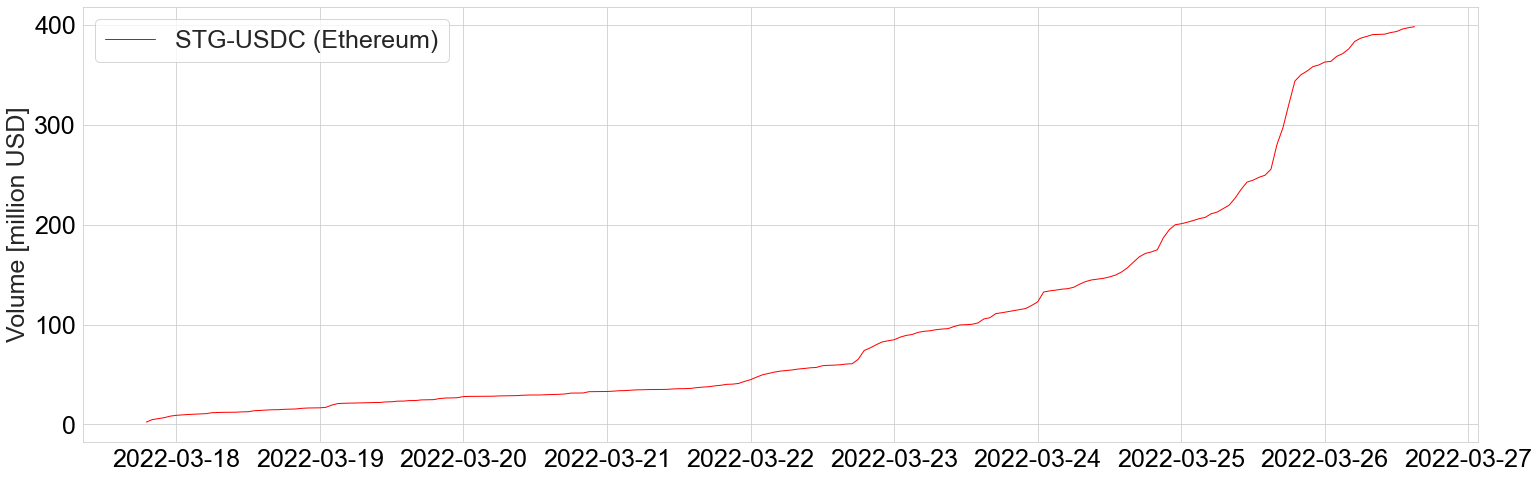

In [9]:
fig, ax = plt.subplots(1,1, figsize=(25, 8))

ax.plot(
    data.index,
    data.volumeUSD.cumsum() * 1e-6,
    color='red',
    label='STG-USDC (Ethereum)',
    lw=1
)

ax.set_ylabel("Volume [million USD]", fontsize=25)
ax.set_xlabel("", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);